# Programa de créditos FOVISSSTE 2024

El presente notebook tiene como objetivo hacer estimaciones sencillas sobre la distribución de los créditos del programa de créditos FOVISSSTE 2024. Para ello, se hace uso de la API del SNIIV para obtener información sobre la distribución de los créditos por mes, entidad federativa, sexo y rango salarial.

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
def consulta(variables):

    base_url = "https://qa-sniiv.sedatu.gob.mx/api/CuboAPI/GetFOVISSSTE/2015,2023/0/0/"
    variables_str = ','.join(map(str, variables))
    
    # url final
    final_url = base_url + variables_str
    
    
    response = requests.get(final_url)
    data = response.json()
    df = pd.DataFrame(data)
    
    return df

In [4]:
def participaciones(df, value_column, groupby_columns):
    group_sums = df.groupby(groupby_columns)[value_column].transform('sum')
    df['percentage'] = (df[value_column] / group_sums) * 100
    return df

### Datos del programa de créditos Fovissste 2024

In [5]:
limite_inferior=47477
limite_superior=56297

## Consulta por mes

In [6]:
mes = participaciones(consulta(['anio','mes']),'acciones',['año'])
#Eliminar año 2015
mes=mes[mes['año']!=2015]
mes = mes.groupby('mes')['percentage'].mean().reset_index()
mes['distr'] = round((mes['percentage'] / 100) * limite_superior,0)
mes["distr"].sum()

56296.0

In [7]:
#Hacer una variable numérica 
mes["mes_num"]=mes["mes"].map({'enero':1, 'febrero':2, 'marzo':3, 'abril':4, 'mayo':5, 
                               'junio':6, 'julio':7, 'agosto':8, 'septiembre':9, 'octubre':10, 'noviembre':11, 'diciembre':12})
#Ordenar por mes
mes=mes.sort_values(by='mes_num')
mes

,mes,percentage,distr,mes_num
3,enero,6.492361,3655.0,1
4,febrero,6.584332,3707.0,2
7,marzo,9.365067,5272.0,3
0,abril,7.899050,4447.0,4
8,mayo,9.462770,5327.0,5
6,junio,9.771978,5501.0,6
5,julio,8.943009,5035.0,7
1,agosto,8.511064,4791.0,8
11,septiembre,7.582711,4269.0,9
10,octubre,8.658250,4874.0,10


In [8]:
mes["percentage"].sum()

100.0

Text(-2, -4, 'Fuente: SEDATU. Dirección General de Desarrollo Urbano, Suelo y Vivienda. Estimaciones propias con información del Programa de Crédito 2024 del FOVISSSTE y del SNIIV.')

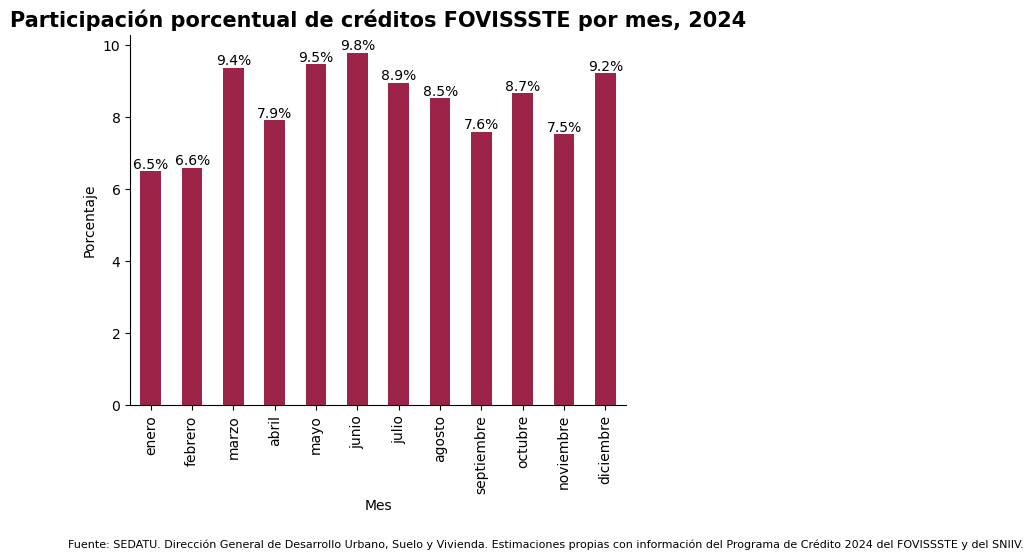

In [9]:
# Gráfica de barras de percentaje de participación por mes
fig, ax = plt.subplots()
mes.plot(kind='bar', x='mes', y='percentage', ax=ax,color='#9d2449')
#Título
plt.title('Participación porcentual de créditos FOVISSSTE por mes, 2024', fontsize=15, weight='bold')
#Etiquetas de los ejes
plt.xlabel('Mes')
plt.ylabel('Porcentaje')
#Eliminar marco izquierdo y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_legend().remove()
#Poner etiquetas en las barras
for index, value in enumerate(mes['percentage']):
    plt.text(index, value, str(round(value,1)) + '%', ha = 'center', va = 'bottom')
#Fuente del gráfico
plt.text(-2, -4,  'Fuente: SEDATU. Dirección General de Desarrollo Urbano, Suelo y Vivienda. Estimaciones propias con información del '
                'Programa de Crédito 2024 del FOVISSSTE y del SNIIV.', ha = 'left', va = 'bottom', fontsize=8)

## Consulta por entidad federativa

In [10]:
entidad = participaciones(consulta(['anio','estado']),'acciones',['año'])
#Porcentaje promedio por entidad
entidad = entidad.groupby('estado')['percentage'].mean().reset_index()
entidad['distr'] = round((entidad['percentage'] / 100) * limite_superior,0)
entidad["distr"].sum()

56298.0

In [15]:
entidad

,estado,percentage,distr
0,Aguascalientes,1.769332,996.0
1,Baja California,1.283808,723.0
2,Baja California Sur,1.807680,1018.0
3,Campeche,1.119153,630.0
4,Chiapas,4.798972,2702.0
5,Chihuahua,3.009111,1694.0
6,Ciudad de México,7.253506,4084.0
7,Coahuila de Zaragoza,2.399675,1351.0
8,Colima,1.231833,693.0
9,Durango,1.952478,1099.0


In [16]:
#Url geojson
geourl="https://raw.githubusercontent.com/strotgen/mexico-leaflet/master/states.geojson"
#Leer geojson
geo=gpd.read_file(geourl)
#Modificar Distrito Federal a Ciudad de México
geo['state_name']=geo['state_name'].replace('Distrito Federal','Ciudad de México')
#Pegar datos a geojson
geo=geo.merge(entidad, left_on='state_name', right_on='estado')
geo

,id,state_code,state_name,geometry,estado,percentage,distr
0,NaN,9,Ciudad de México,"POLYGON ((-99.09052 19.50926, -99.06421 19.498...",Ciudad de México,7.253506,4084.0
1,NaN,12,Guerrero,"POLYGON ((-100.53878 18.84399, -100.50201 18.8...",Guerrero,3.572873,2011.0
2,NaN,15,México,"POLYGON ((-99.85919 20.26838, -99.85950 20.264...",México,8.537082,4806.0
3,NaN,17,Morelos,"POLYGON ((-99.06199 19.04877, -99.02935 19.085...",Morelos,4.145241,2334.0
4,NaN,25,Sinaloa,"POLYGON ((-108.47046 27.03457, -108.42165 27.0...",Sinaloa,3.121585,1757.0
5,NaN,2,Baja California,"MULTIPOLYGON (((-115.21380 28.37512, -115.1675...",Baja California,1.283808,723.0
6,NaN,26,Sonora,"MULTIPOLYGON (((-112.55438 28.73103, -112.5553...",Sonora,2.280513,1284.0
7,NaN,3,Baja California Sur,"MULTIPOLYGON (((-109.80049 24.15197, -109.8020...",Baja California Sur,1.807680,1018.0
8,NaN,32,Zacatecas,"POLYGON ((-101.60033 24.75414, -101.59780 24.7...",Zacatecas,1.283839,723.0
9,NaN,10,Durango,"POLYGON ((-105.93181 26.76559, -105.89409 26.7...",Durango,1.952478,1099.0


C:\Users\claud\miniconda3\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


(-119.9838424819165, -85.14023487565792, 13.622770601282594, 33.62798133592776)

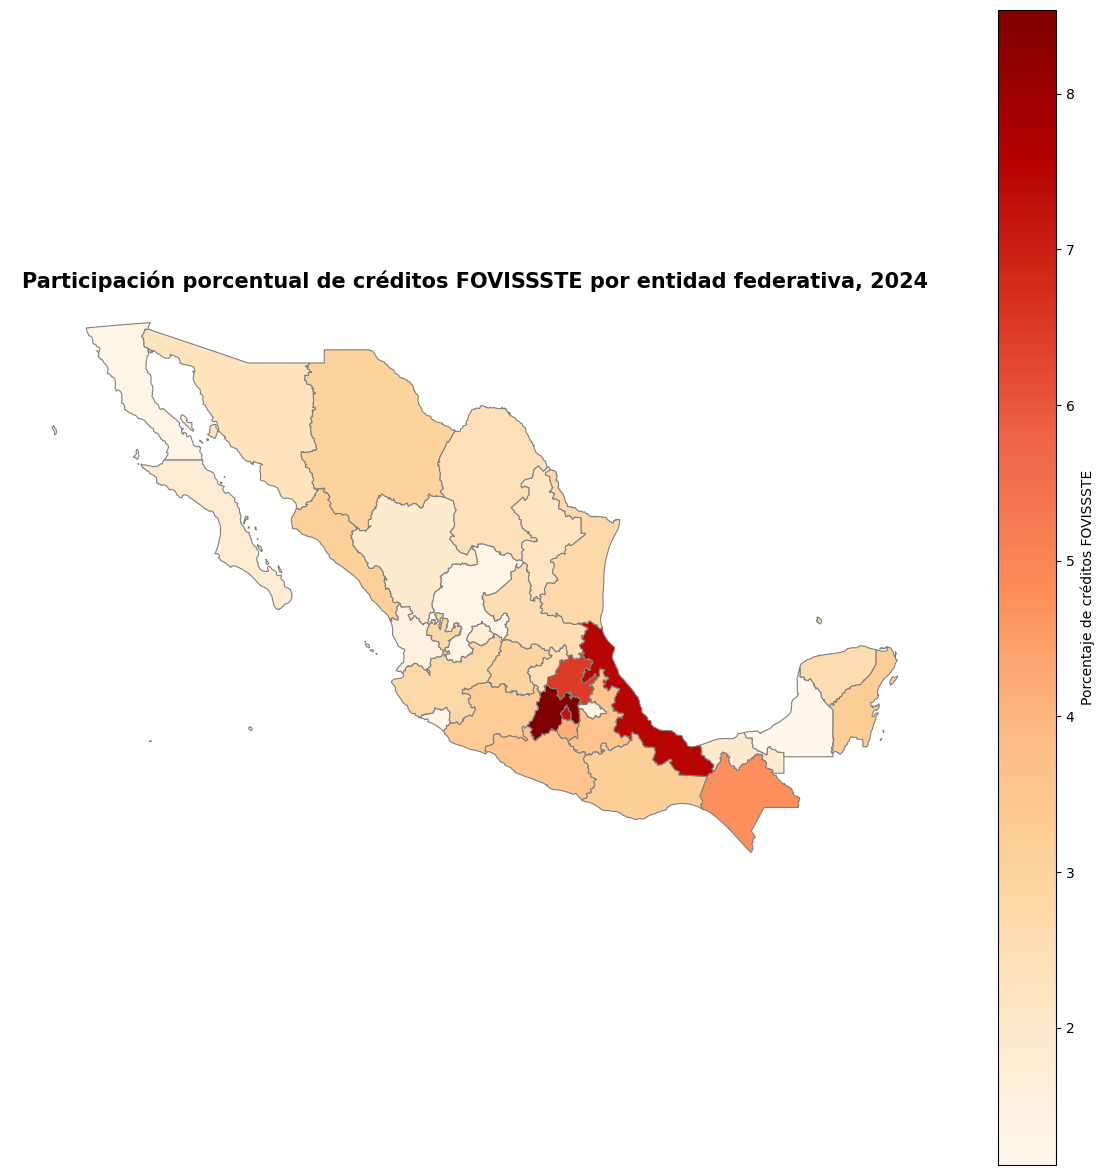

In [28]:
# Hacer mapa de participación por entidad federativa
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
geo.plot(column='percentage', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True, legend_kwds={'label': 'Porcentaje de créditos FOVISSSTE'})

#Título
plt.title('Participación porcentual de créditos FOVISSSTE por entidad federativa, 2024', fontsize=15, weight='bold')

ax.axis("off")
#Modificar tamaño de la paleta


## Consulta por sexo


In [146]:
sexo = participaciones(consulta(['anio','genero']),'acciones',['año'])
#Porcentaje promedio por entidad
sexo=sexo.groupby('sexo')['percentage'].mean().reset_index()
#Aplicar percentaje de participación al limite superior
sexo['distr'] = round((sexo['percentage'] / 100) * limite_superior,0)
sexo['distr'].sum()
sexo

,sexo,percentage,distr
0,Hombre,44.039736,24793.0
1,Mujer,55.960264,31504.0


Text(-1, -16, 'Fuente: SEDATU. Dirección General de Desarrollo Urbano, Suelo y Vivienda. Estimaciones propias con información del Programa de Crédito 2024 del FOVISSSTE y del SNIIV.')

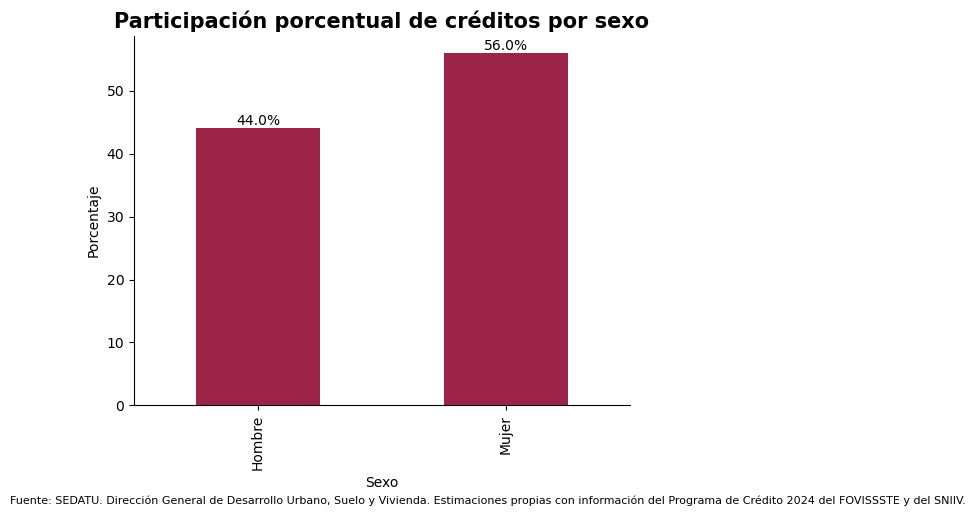

In [149]:
# Gráfica de barras de percentaje de participación por sexo
fig, ax = plt.subplots()
sexo.plot(kind='bar', x='sexo', y='percentage', ax=ax,color='#9d2449')
#Título
plt.title('Participación porcentual de créditos por sexo', fontsize=15, weight='bold')
#Etiquetas de los ejes
plt.xlabel('Sexo')
plt.ylabel('Porcentaje')
#Eliminar marco izquierdo y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#Eliminar leyenda
ax.get_legend().remove()
#Poner etiquetas en las barras
for index, value in enumerate(sexo['percentage']):
    plt.text(index, value, str(round(value,1)) + '%', ha = 'center', va = 'bottom')
    
#Fuente del gráfico
plt.text(-1, -16, 'Fuente: SEDATU. Dirección General de Desarrollo Urbano, Suelo y Vivienda. Estimaciones propias con información del '
                'Programa de Crédito 2024 del FOVISSSTE y del SNIIV.', ha = 'left', va = 'bottom', fontsize=8)

## Consulta por rango de ingreso y valor de la vivienda

In [160]:
salario = participaciones(consulta(['anio','rango_salarial']),'acciones',['año'])
#Porcentaje promedio por entidad
salario = salario.groupby('rango_salarial')['percentage'].mean().reset_index()
salario['distr'] = round((salario['percentage'] / 100) * limite_superior,0)
salario["distr"].sum()

56443.0

Text(-1, -16, 'Fuente: SEDATU. Dirección General de Desarrollo Urbano, Suelo y Vivienda. Estimaciones propias con información del Programa de Crédito 2024 del FOVISSSTE y del SNIIV.')

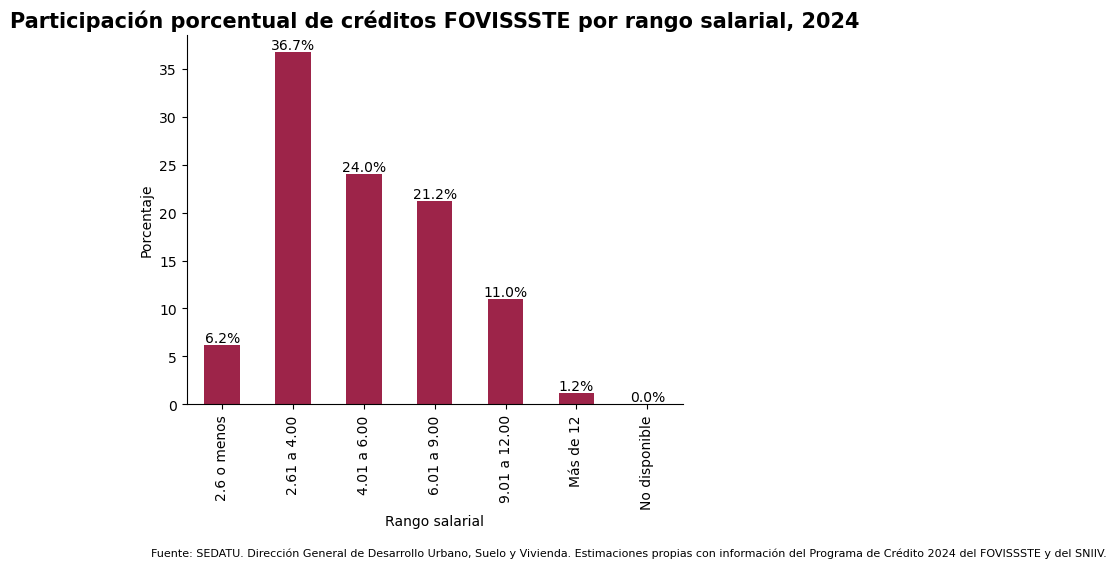

In [164]:
fig, ax = plt.subplots()
salario.plot(kind='bar', x='rango_salarial', y='percentage', ax=ax,color='#9d2449')
#Título
plt.title('Participación porcentual de créditos FOVISSSTE por rango salarial, 2024', fontsize=15, weight='bold')
#Etiquetas de los ejes
plt.xlabel('Rango salarial')
plt.ylabel('Porcentaje')
#Eliminar marco izquierdo y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#Eliminar leyenda
ax.get_legend().remove()
#Poner etiquetas en las barras
for index, value in enumerate(salario['percentage']):
    plt.text(index, value, str(round(value,1)) + '%', ha = 'center', va = 'bottom')
#Fuente del gráfico
plt.text(-1, -16, 'Fuente: SEDATU. Dirección General de Desarrollo Urbano, Suelo y Vivienda. Estimaciones propias con información del '
                'Programa de Crédito 2024 del FOVISSSTE y del SNIIV.', ha = 'left', va = 'bottom', fontsize=8)
